### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [6]:
# Lettura del dataset
import pandas as pd
from sys import exit

METHOD = "local"

try:
    if METHOD == "local":
        # A volte in uni non prende eduroam.....
        df = pd.read_csv("local/alcohol.csv")
    elif METHOD == "remote":
        df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
    else:
        exit("Error: Invalid method")
except Exception as e:
    exit("Error: " + str(e))
df


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [8]:
# Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)
df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
61,France,127,151,370,11.8
45,Czech Republic,361,170,134,11.8
141,Russian Federation,247,326,73,11.5
99,Luxembourg,236,133,271,11.4
155,Slovakia,196,293,116,11.4
81,Ireland,313,118,165,11.4


In [10]:
# Calcola la media del consumo di birra, vino, e distillati
f"Media beer_servings: {int(df["beer_servings"].mean())}", f"Media wine_servings: {int(df["wine_servings"].mean())}", f"Media spirit_servings: {int(df["spirit_servings"].mean())}"

('Media beer_servings: 106',
 'Media wine_servings: 49',
 'Media spirit_servings: 80')

In [11]:
# Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`
df["alcohol_index"] = (df["beer_servings"] + df["wine_servings"] + df["spirit_servings"]) / 3
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
0,Afghanistan,0,0,0,0.0,0.000000
1,Albania,89,132,54,4.9,91.666667
2,Algeria,25,0,14,0.7,13.000000
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,145.333333
189,Vietnam,111,2,1,2.0,38.000000
190,Yemen,6,0,0,0.1,2.000000
191,Zambia,32,19,4,2.5,18.333333


In [ ]:
# Trova il paese con il valore massimo di alcohol_index
df.sort_values(by="alcohol_index", ascending=False).head(1)

In [ ]:
# Filtra solo i paesi che consumano più di 100 birre all’anno
df[df["beer_servings"] > 100]

0      False
1      False
2      False
3       True
4       True
       ...  
188     True
189     True
190    False
191    False
192    False
Name: beer_servings, Length: 193, dtype: bool

<Axes: xlabel='country'>

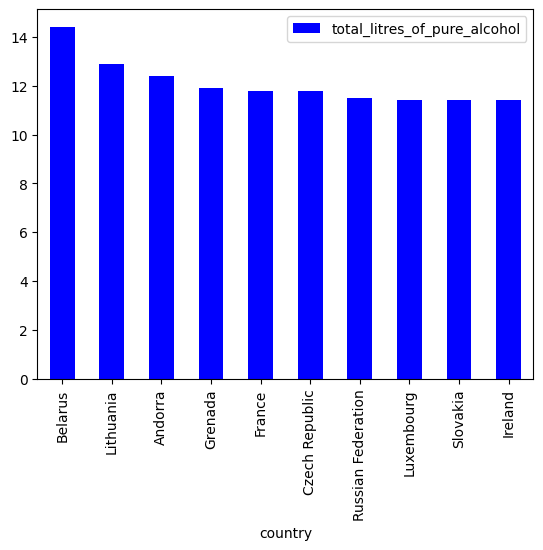

In [20]:
# Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)
import matplotlib.pyplot as plt
df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10).plot(kind="bar", x="country", y="total_litres_of_pure_alcohol", color="blue")

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

c:\Users\sanfi\.conda\envs\test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sanfi\.conda\envs\test\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sanfi\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer

In [ ]:
# Lo **stipendio medio annuale** (`salary_year_avg`)
filtered_df = df.dropna(subset=['salary_year_avg']) # Rimuove le righe con stipendio mancante
for location in filtered_df['job_location'].unique():
    if filtered_df[filtered_df['job_location'] == location].empty:
        continue
    average_salary = filtered_df[filtered_df['job_location'] == location]['salary_year_avg'].mean()
    print(f"Average salary in {location}: {average_salary}")

Average salary in San José Province, San José, Costa Rica: 113709.66666666667
Average salary in Arlington, VA: 124705.47468171296
Average salary in Anywhere: 131601.89967882738
Average salary in Mountain View, CA: 186427.72807017545
Average salary in Seattle, WA: 169387.41911764705
Average salary in Dos Palos, CA: 83964.28571428571
Average salary in Brussels, Belgium: 92906.12068965517
Average salary in Brighton, TN: 103128.0
Average salary in Austin, TX: 126725.13332648027
Average salary in United States: 143879.1259710452
Average salary in Durham, NC: 125383.06060606061
Average salary in New Ulm, MN: 90500.0
Average salary in Atlantic Beach, FL: 133285.0
Average salary in San Francisco, CA: 161541.55309693114
Average salary in San Pedro Sula, Honduras: 63000.0
Average salary in Lansing, MI: 101994.25
Average salary in Wilmington, DE: 129284.66165865384
Average salary in Irvine, CA: 117604.1993336397
Average salary in Cincinnati, OH: 121832.69230769231
Average salary in Culver City, C

In [52]:
# Il **numero totale di offerte di lavoro** (job count)
for location in filtered_df['job_location'].unique():
    job_count = df[df['job_location'] == location].shape[0]
    print(f"Numero totale di offerte di lavoro in {location}: {job_count}")

Numero totale di offerte di lavoro in San José Province, San José, Costa Rica: 2402
Numero totale di offerte di lavoro in Arlington, VA: 1684
Numero totale di offerte di lavoro in Anywhere: 69552
Numero totale di offerte di lavoro in Mountain View, CA: 1054
Numero totale di offerte di lavoro in Seattle, WA: 623
Numero totale di offerte di lavoro in Dos Palos, CA: 16
Numero totale di offerte di lavoro in Brussels, Belgium: 3919
Numero totale di offerte di lavoro in Brighton, TN: 1
Numero totale di offerte di lavoro in Austin, TX: 4955
Numero totale di offerte di lavoro in United States: 7454
Numero totale di offerte di lavoro in Durham, NC: 661
Numero totale di offerte di lavoro in New Ulm, MN: 7
Numero totale di offerte di lavoro in Atlantic Beach, FL: 8
Numero totale di offerte di lavoro in San Francisco, CA: 4627
Numero totale di offerte di lavoro in San Pedro Sula, Honduras: 21
Numero totale di offerte di lavoro in Lansing, MI: 60
Numero totale di offerte di lavoro in Wilmington, DE

KeyboardInterrupt: 

In [53]:
# L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)
for location in filtered_df['job_location'].unique():
    min_salary = filtered_df[filtered_df['job_location'] == location]['salary_year_avg'].min()
    max_salary = filtered_df[filtered_df['job_location'] == location]['salary_year_avg'].max()
    print(f"Min salary in {location}: {min_salary}, Max salary in {location}: {max_salary}")

Min salary in San José Province, San José, Costa Rica: 98283.0, Max salary in San José Province, San José, Costa Rica: 165000.0
Min salary in Arlington, VA: 58400.0, Max salary in Arlington, VA: 213000.0
Min salary in Anywhere: 16500.0, Max salary in Anywhere: 650000.0
Min salary in Mountain View, CA: 75000.0, Max salary in Mountain View, CA: 350000.0
Min salary in Seattle, WA: 90000.0, Max salary in Seattle, WA: 260775.0
Min salary in Dos Palos, CA: 52900.0, Max salary in Dos Palos, CA: 95200.0
Min salary in Brussels, Belgium: 56700.0, Max salary in Brussels, Belgium: 165000.0
Min salary in Brighton, TN: 103128.0, Max salary in Brighton, TN: 103128.0
Min salary in Austin, TX: 37500.0, Max salary in Austin, TX: 375000.0
Min salary in United States: 33488.5, Max salary in United States: 375000.0
Min salary in Durham, NC: 77300.0, Max salary in Durham, NC: 175000.0
Min salary in New Ulm, MN: 89000.0, Max salary in New Ulm, MN: 95000.0
Min salary in Atlantic Beach, FL: 133285.0, Max salar

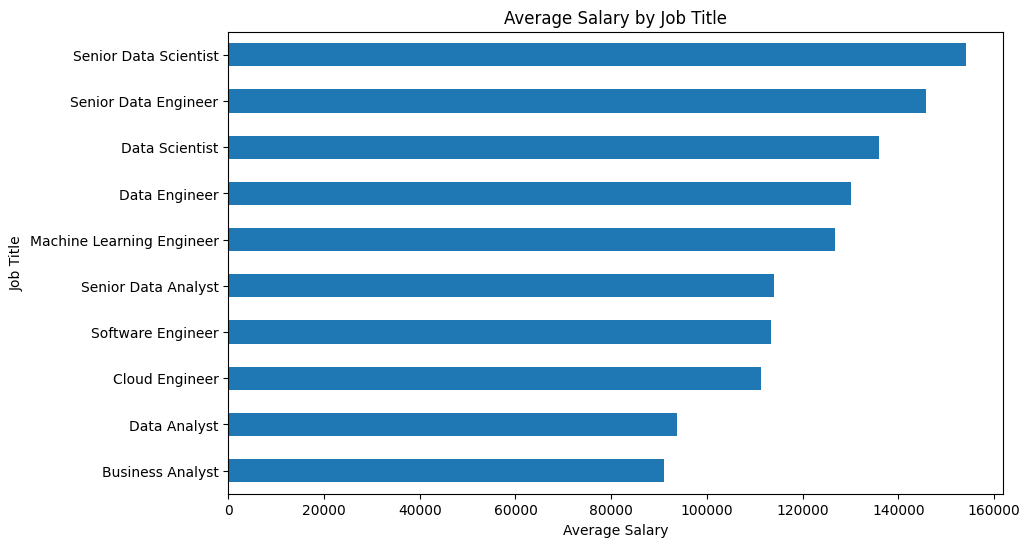

In [55]:
#Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.
import matplotlib.pyplot as plt

df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()